<a href="https://colab.research.google.com/github/Leonardorochagit/Geracao_Energia/blob/main/4_Neural_Prophet_face_Geracao_AM_2018_a_2021_dia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NEURAL PROPETH GERAÇÃO AM 2018 A 2021**

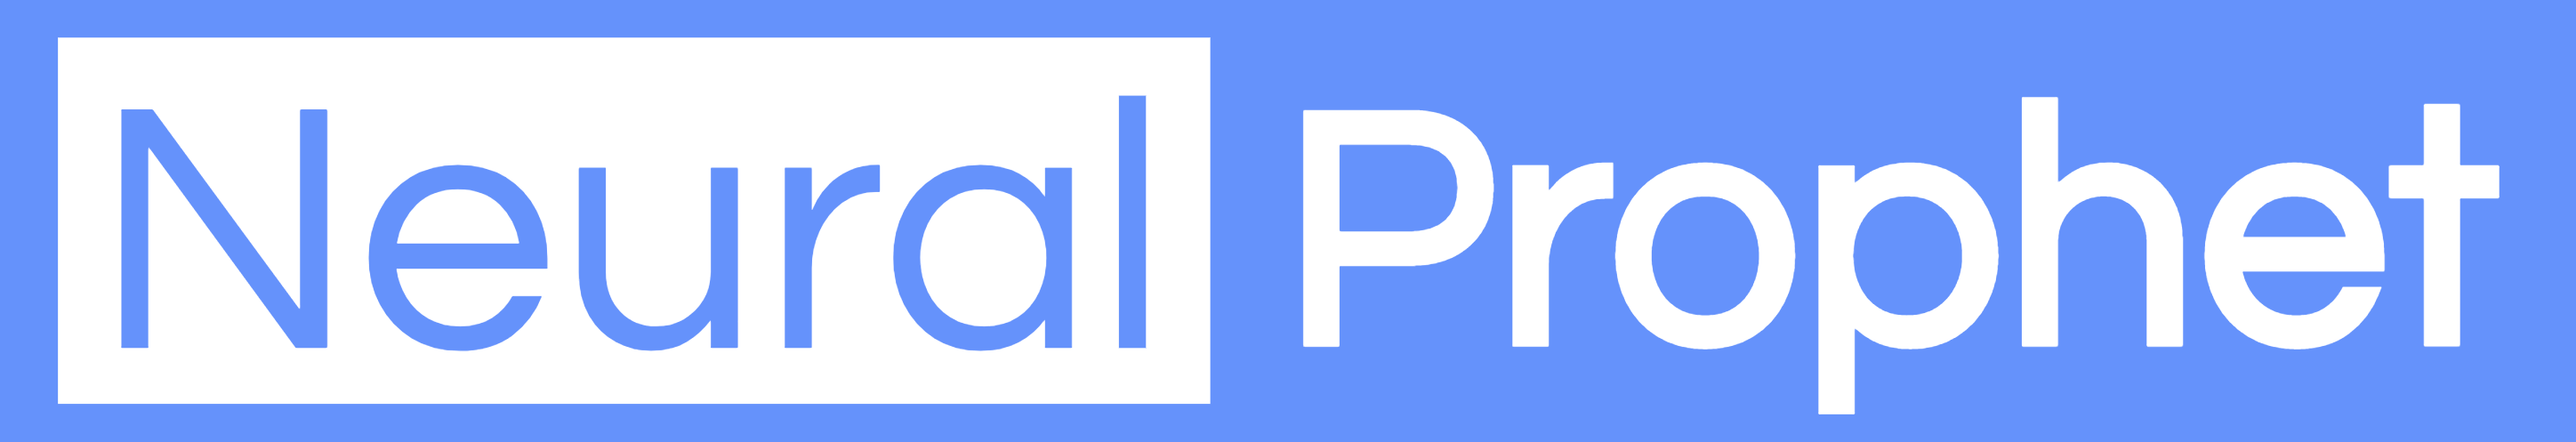

### Referencias

prophet face geracao 18 a 21 hora.ipynb

https://neuralprophet.com/html/changes-from-prophet.html

O que mudou do Profeta 
NeuralProphet tem uma série de recursos adicionais em relação ao Profeta original. Eles são os seguintes.
Gradient Descent para otimização usando PyTorch como back-end.
Modelagem de autocorrelação de séries temporais usando AR-Net
Modelagem de regressores defasados ​​usando uma Rede Neural Feed-Forward separada.
Camadas profundas não lineares configuráveis ​​dos FFNNs.
Ajustável a horizontes de previsão específicos (superiores a 1).
Perdas e métricas personalizadas.
Devido à modularidade do código e à extensibilidade suportada pelo PyTorch, qualquer componente treinável por gradiente descendente pode ser adicionado como um módulo ao NeuralProphet. Usar o PyTorch como back-end torna o processo de modelagem muito mais rápido em comparação com o Profeta original, que usa Stan como back-end.

https://github.com/ourownstory/neural_prophet/blob/main/tutorials/application-example/energy_hospital_load.ipynb

https://colab.research.google.com/drive/1Uj6_87n_Mb0uT9CyGz6ToILolBpaM6l9#scrollTo=0Krto6fIvHit


https://towardsdatascience.com/neural-prophet-a-time-series-modeling-library-based-on-neural-networks-dd02dc8d868d

https://towardsdatascience.com/how-to-use-facebooks-neuralprophet-and-why-it-s-so-powerful-136652d2da8b
https://github.com/ourownstory/neural_prophet

https://ealizadeh.com/blog/neural-prophet-library
https://github.com/AmolMavuduru/NeuralProphetExamples/blob/master/NeuralProphet%20Examples.ipynb

### Preparação do Dataframe para aplicar no modelo

In [1]:
#  !pip install pystan==2.19.1.1

#! pip install prophet

In [2]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

# we also need prophet for this notebook
# !pip install prophet
from neuralprophet import NeuralProphet, set_log_level
from neuralprophet.benchmark import Dataset, NeuralProphetModel, ProphetModel
from neuralprophet.benchmark import SimpleBenchmark, CrossValidationBenchmark
#set_log_level("ERROR")

  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-1x0e7ej_
  Running command git clone -q https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-1x0e7ej_
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 172 kB 12.8 MB/s 
  Created wheel for neuralprophet: filename=neuralprophet-0.3.3-py3-none-any.whl size=75823 sha256=afef1e2ba81c4c8e28846c7aacd43b66fc431ea67ca1543fe116d97b1d4c678e
  Stored in directory: /tmp/pip-ephem-wheel-cache-7qf5grlq/wheels/bc/d0/dd/f2b1133865669ed9b544f6f1ff9155aedf57c9dbfc72ce211e
Successfully built neuralprophet
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [3]:
!git clone https://github.com/ourownstory/neural_prophet
!cd neural_prophet
!pip install .[live]

Cloning into 'neural_prophet'...
remote: Enumerating objects: 6384, done.
remote: Counting objects: 100% (2949/2949), done.
remote: Compressing objects: 100% (957/957), done.
remote: Total 6384 (delta 2167), reused 2613 (delta 1982), pack-reused 3435
Receiving objects: 100% (6384/6384), 107.21 MiB | 21.22 MiB/s, done.
Resolving deltas: 100% (4208/4208), done.
ERROR: Directory '.[live]' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [4]:
#!pip install neuralprophet[live]

In [5]:
#!pip install neuralprophet
#!pip install neuralprophet[live] #Jupyter Notbook

In [6]:
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly, plot_components_plotly

In [7]:
import plotly.io as pio
pio.renderers.default = "colab"

In [8]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from pandas import Grouper 
from pandas import DataFrame
from datetime import datetime

#Graficos 
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from matplotlib import pyplot
import seaborn as sns 

#Plotly Colab
import plotly.io as pio
pio.renderers.default = "colab"

#Prophert 
from fbprophet import Prophet
from neuralprophet import NeuralProphet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric


import warnings
warnings.filterwarnings("ignore")
#import warnings; warnings.filterwarnings(action='once')

#plt.rcParams["figure.figsize"] = (15,15)
large = 22; med = 16; small = 12; params = {'axes.titlesize': large, 'legend.fontsize': med, 'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med, 'xtick.labelsize': med, 'ytick.labelsize': med,  'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.style.use('seaborn')
sns.set()
%matplotlib inline 

In [9]:
#Importando os pacotes 
#https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Introdu%C3%A7%C3%A3o_ao_Plotly.ipynb#scrollTo=4NV0oNoMmLfw
#https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Introdu%C3%A7%C3%A3o_ao_Plotly.ipynb#scrollTo=tF4mhRnomRc7
# bibliotecas para trabalhar offline com a biblioteca
import plotly
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
#from plotly.offline import plot, iplot
#import cufflinks as cf # para conectar o plotly ao pandas
#cf.go_offline()
#plotly.offline.init_notebook_mode(connected = True)
#import plotly.io as pio
#pio.renderers

In [10]:
# lendo o dataset e criando um dataframe de series temporais: O arquivo está sem sem outliers 
df = pd.read_csv('https://raw.githubusercontent.com/Leonardorochagit/Geracao_Energia/main/Base_ONS/dataset_dfsout1.csv', delimiter=';', 
                  encoding = 'utf-8') #  index_col='Unnamed: 0',  skiprows=0, squeeze=True, parse_dates=False,engine='c'
df.head(-1)

,Data Dica,geracao
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1455,2021-12-26,17.592541
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582


In [11]:
df= df.rename(columns={'Data Dica':'data'})
df

,data,geracao
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582
1459,2021-12-30,17.836814


In [12]:
# del df['Unnamed: 0']

In [13]:
df.data= pd.to_datetime(df.data) #, format="%d/%m/%Y"
df

,data,geracao
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582
1459,2021-12-30,17.836814


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     1461 non-null   datetime64[ns]
 1   geracao  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [15]:
df_pro =df[['data', 'geracao']]
df_pro.columns=['ds', 'y']
df_pro.head(-1)

,ds,y
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1455,2021-12-26,17.592541
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582


In [16]:
df_teste=df_pro[(df_pro['ds']>='2021-01-01')]
df_teste

,ds,y
1096,2021-01-01,22.876548
1097,2021-01-02,24.640270
1098,2021-01-03,21.461506
1099,2021-01-04,23.420420
1100,2021-01-05,24.242198
...,...,...
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582
1459,2021-12-30,17.836814


In [17]:
fig = px.line(df_teste, x='ds', y="y") 
fig.update_layout(autosize=True,width=1000, height=600)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [18]:
df_treino=df_pro[(df_pro['ds']>='2018-01-01')& (df_pro['ds']<='2020-12-31')]
df_treino

,ds,y
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1091,2020-12-27,22.889017
1092,2020-12-28,24.492370
1093,2020-12-29,24.524423
1094,2020-12-30,23.104828


In [19]:
# Add traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_treino.ds, y=df_treino.y,
                    mode='lines', name='Treino'), )

fig.add_trace(go.Scatter(x=df_teste.ds, y=df_teste.y,
                    mode='lines',name='Teste'))
#fig.add_trace(go.Scatter(x=dfmes_dt.index, y=dfmes_dt['variancia'],
#                    mode='lines',name='Variância', line = {'color': 'orange', 'dash': 'dot'}))
              
# Atualizando os eixos x
fig.update_xaxes( title_text = " Tempo", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Atualizando os eixos y
fig.update_yaxes( title_text = "Geração de Energia (MWh)", showgrid=True, gridwidth=1,   gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Adicionando o template
fig.update_layout(template = 'plotly_white') 
#legend
fig.update_layout(legend=dict(orientation="h", font = {'family': 'Arial','size': 10,'color': 'black'},
    yanchor="bottom", y=1, xanchor="right", x=0.9))

# Title 
fig.update_layout(title='Geração de Energia no Amazonas 2018 a 2021', title_x=0.5,title_y=0.93, plot_bgcolor = 'white',
font = {'family': 'Arial','size': 12,'color': 'black'},)

# Menu com seleção de periodo de analise
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(autosize=True,width=900, height=600) #Salvando e exibindo o grafico 
#fig.write_image("grafico.png") 
#Salvando e exibindo o grafico 
fig.update_layout(autosize=True,width=1500, height=800)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

##**2.Neural Prophert Facebook - DIA**




https://colab.research.google.com/github/ourownstory/neural_prophet/blob/main/tutorials/feature-use/test_and_crossvalidate.ipynb#scrollTo=c7d050b7-2b8e-40d1-ba4d-e43e22a64c48

https://ealizadeh.com/blog/neural-prophet-library 

In [20]:
 #!pip install neuralprophet[live]

In [21]:
# #https://ealizadeh.com/blog/neural-prophet-library
# #https://neuralprophet.com/html/hyperparameter-selection.html?highlight=hyper  Padrões ddos parâmetros
#model = NeuralProphet() #if you're using default variables below. (fiz mudanças so no link o original ass:Leonardo)
m = NeuralProphet(
    growth='off',  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints='automatic', # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto", #8
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="multiplicative", #additive
    seasonality_reg=0,
    n_forecasts=1,
    n_lags= 7, #0
    num_hidden_layers=0, #:0
    d_hidden=5,     # Dimension of hidden layers of AR-Net: none 
    #ar_sparsity=None,  # Sparcity in the AR coefficients
    learning_rate=0.01,
    epochs=500,
    batch_size=None,
    loss_func="Huber",
    optimizer="AdamW",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True,
    collect_metrics=True
    #log_level=None, # Determines the logging level of the logger object
)


In [22]:
m = m.add_country_holidays("BR")
metrics = m.fit(df_treino, freq="D", progress="plot-all") #,validation_df=df_teste
future = m.make_future_dataframe(df_teste, periods=364, n_historic_predictions=len(df_teste)) #df_treino, periods=730, n_historic_predictions=len(df_treino)

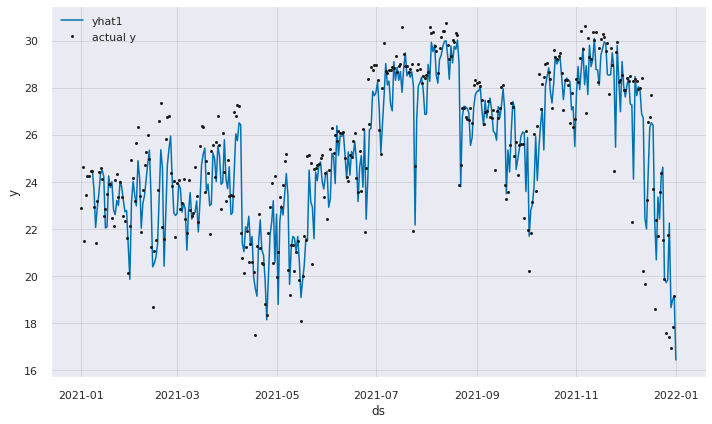

In [23]:
forecast = m.predict(future)
fig = m.plot(forecast)

In [24]:
forecast

,ds,y,yhat1,residual1,ar1,trend,season_yearly,season_weekly,events_additive,event_Ano novo,...,event_Finados,event_Independência do Brasil,event_Natal,event_Nossa Senhora Aparecida,event_Proclamação da República,event_Páscoa,"event_Páscoa, Tiradentes",event_Quarta-feira de cinzas (Início da Quaresma),event_Sexta-feira Santa,event_Tiradentes
0,2021-01-01,22.876548,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2021-01-02,24.640270,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2021-01-03,21.461506,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2021-01-04,23.420420,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2021-01-05,24.242198,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-12-28,17.418880,22.242672,4.823792,8.039853,14.133657,0.106464,-0.028839,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,2021-12-29,16.949582,18.649981,1.700399,4.222126,14.133657,0.104427,0.225768,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363,2021-12-30,17.836814,18.981068,1.144254,4.54857,14.133657,0.102299,0.233108,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,2021-12-31,19.155768,19.145748,-0.01002,4.672968,14.133657,0.100044,0.280574,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
dfh=forecast.copy()
dfh.set_index('ds', inplace=True)

dfh=dfh.loc['2021-01-01':'2021-12-31' ]
dfh

,y,yhat1,residual1,ar1,trend,season_yearly,season_weekly,events_additive,event_Ano novo,event_Carnaval,...,event_Finados,event_Independência do Brasil,event_Natal,event_Nossa Senhora Aparecida,event_Proclamação da República,event_Páscoa,"event_Páscoa, Tiradentes",event_Quarta-feira de cinzas (Início da Quaresma),event_Sexta-feira Santa,event_Tiradentes
ds,,,,,,,,,,,,,,,,,,,,,
2021-01-01,22.876548,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2021-01-02,24.640270,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2021-01-03,21.461506,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2021-01-04,23.420420,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2021-01-05,24.242198,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,21.742712,19.82074,-1.921972,4.771601,14.133657,0.108443,0.919056,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-28,17.418880,22.242672,4.823792,8.039853,14.133657,0.106464,-0.028839,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-29,16.949582,18.649981,1.700399,4.222126,14.133657,0.104427,0.225768,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
dfc=DataFrame()
dfc['ds']=dfh.index
dfc.set_index('ds',inplace=True)
dfc['pred']=dfh.yhat1
dfc2=DataFrame()
dfc2=df_teste.copy()
dfc2.set_index('ds',inplace=True)
dfc2['pred']=dfc['pred']
dfc2=dfc2.reset_index('ds')
dfc2

,ds,y,pred
0,2021-01-01,22.876548,None
1,2021-01-02,24.640270,None
2,2021-01-03,21.461506,None
3,2021-01-04,23.420420,None
4,2021-01-05,24.242198,None
...,...,...,...
360,2021-12-27,21.742712,19.82074
361,2021-12-28,17.418880,22.242672
362,2021-12-29,16.949582,18.649981
363,2021-12-30,17.836814,18.981068


In [27]:
df3 = dfc2.replace(to_replace='None', value=np.nan).dropna()
#df.dropnan()
df3['pred'] = df3['pred'].astype(float)
df3

,ds,y,pred
7,2021-01-08,24.468529,24.484638
8,2021-01-09,22.918686,23.653278
9,2021-01-10,21.401070,22.056534
10,2021-01-11,23.188436,22.883228
11,2021-01-12,24.418810,23.495049
...,...,...,...
360,2021-12-27,21.742712,19.820740
361,2021-12-28,17.418880,22.242672
362,2021-12-29,16.949582,18.649981
363,2021-12-30,17.836814,18.981068


In [28]:
df3.describe()

,y,pred
count,358.000000,358.000000
mean,25.433016,25.221872
std,3.190228,2.858247
min,16.949582,18.131908
25%,23.201116,23.049485
50%,25.575640,25.215422
75%,28.314592,27.831450
max,30.736477,30.089783


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 7 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      358 non-null    datetime64[ns]
 1   y       358 non-null    float64       
 2   pred    358 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 11.2 KB


In [30]:
y_true = df3['y']
y_pred = df3['pred']
from sklearn.metrics import mean_absolute_percentage_error
MAPE3=mean_absolute_percentage_error(y_true, y_pred)
print ("MAPE Neural Prophet = {:0.2f}%". format(MAPE3*100))

MAPE Neural Prophet = 4.62%


In [31]:
metrics.head(-1)

,SmoothL1Loss,MAE,RMSE,RegLoss
0,1.845916,36.286938,43.282050,0.0
1,1.827169,35.983292,42.963861,0.0
2,1.808715,35.685491,42.654298,0.0
3,1.789541,35.374604,42.356043,0.0
4,1.768805,35.038699,42.007980,0.0
...,...,...,...,...
494,0.006513,1.196465,1.738349,0.0
495,0.006513,1.196393,1.748409,0.0
496,0.006513,1.196352,1.740380,0.0
497,0.006513,1.196344,1.747511,0.0


In [32]:
df3.to_csv(r'/content/neuralprophet.csv', encoding = 'utf-8', sep =';', header=True, index=True) #dataset sem outliers, foram retirados Turkey Method

In [33]:
df_teste.to_csv(r'/content/teste.csv', encoding = 'utf-8', sep =';', header=True, index=True) #dataset sem outliers, foram retirados Turkey Method

In [34]:
df_treino.to_csv(r'/content/treino.csv', encoding = 'utf-8', sep =';', header=True, index=True) #dataset sem outliers, foram retirados Turkey Method

In [35]:
#plot_components_plotly(m, forecast)# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_treino['ds'], y=df_treino['y'], #(x=df_treino['ds'], y=df_treino['y'],
                    mode='lines', name='Treino'))
fig.add_trace(go.Scatter(x=df_teste['ds'], y=df_teste['y'],
                    mode='lines', name='Teste'))
fig.add_trace(go.Scatter(x=df3['ds'], y=df3['pred'],
                    mode='lines', name='Predito'))

fig.update_layout(title="Complonentes plotly")
# Menu com seleção de periodo de analise
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Atualizando os eixos x
fig.update_xaxes( title_text = " Tempo", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Atualizando os eixos y
fig.update_yaxes( title_text = "Geração de Energia (GWh)", showgrid=True, gridwidth=1,   gridcolor='lightgray',showline=True, linewidth=1, linecolor='black', range=[5,40])
# Adicionando o template
fig.update_layout(template = 'plotly_white') 
#legend
fig.update_layout(legend=dict(orientation="h", font = {'family': 'Arial','size': 10,'color': 'black'},
    yanchor="bottom", y=1, xanchor="right", x=0.9))

fig.update_layout(autosize=True,width=900, height=600) #Salvando e exibindo o grafico 
#fig.write_image("grafico.png") 
#Salvando e exibindo o grafico 
fig.update_layout(autosize=True,width=1200, height=800)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

Text(0.5, 1.0, 'Geração no Amazonas 2018-2021 ')

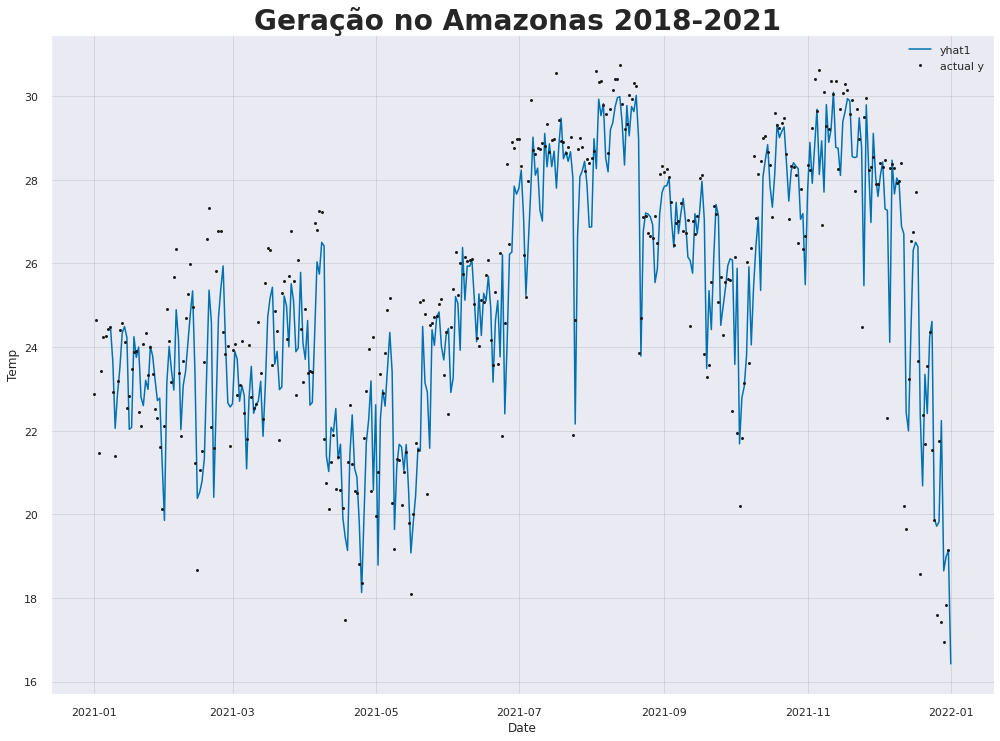

In [36]:
fig, ax = plt.subplots(figsize=(14, 10))
m.plot(forecast, xlabel="Date", ylabel="Temp", ax=ax)
ax.set_title("Geração no Amazonas 2018-2021 ", fontsize=28, fontweight="bold")

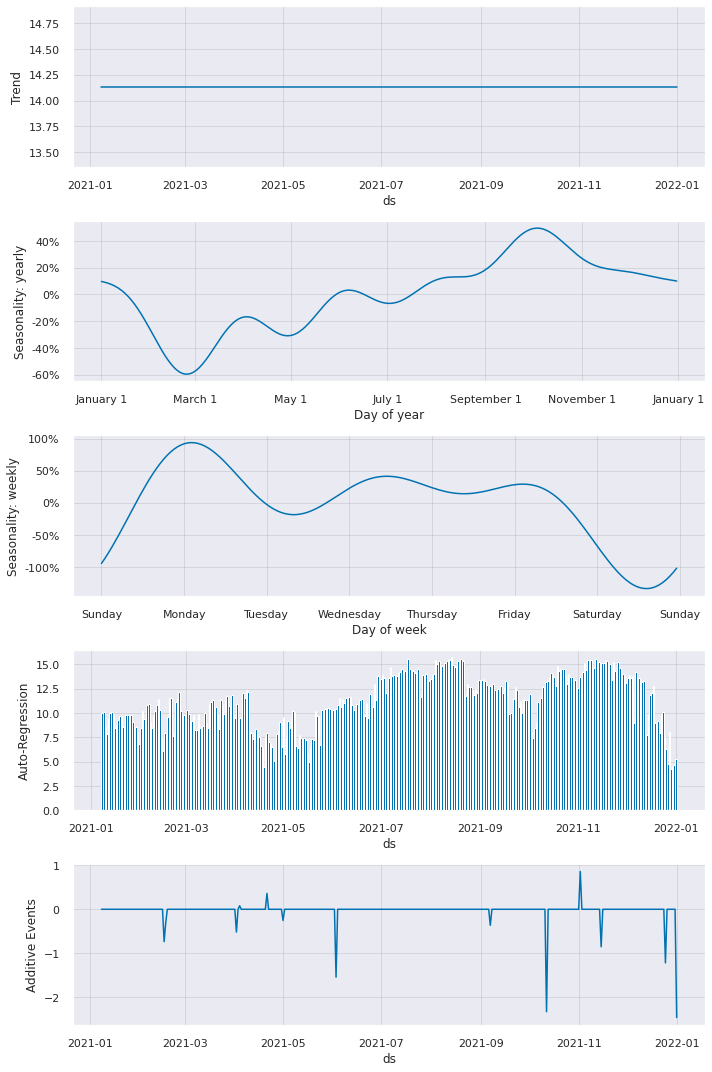

In [37]:
fig_comp = m.plot_components(forecast)

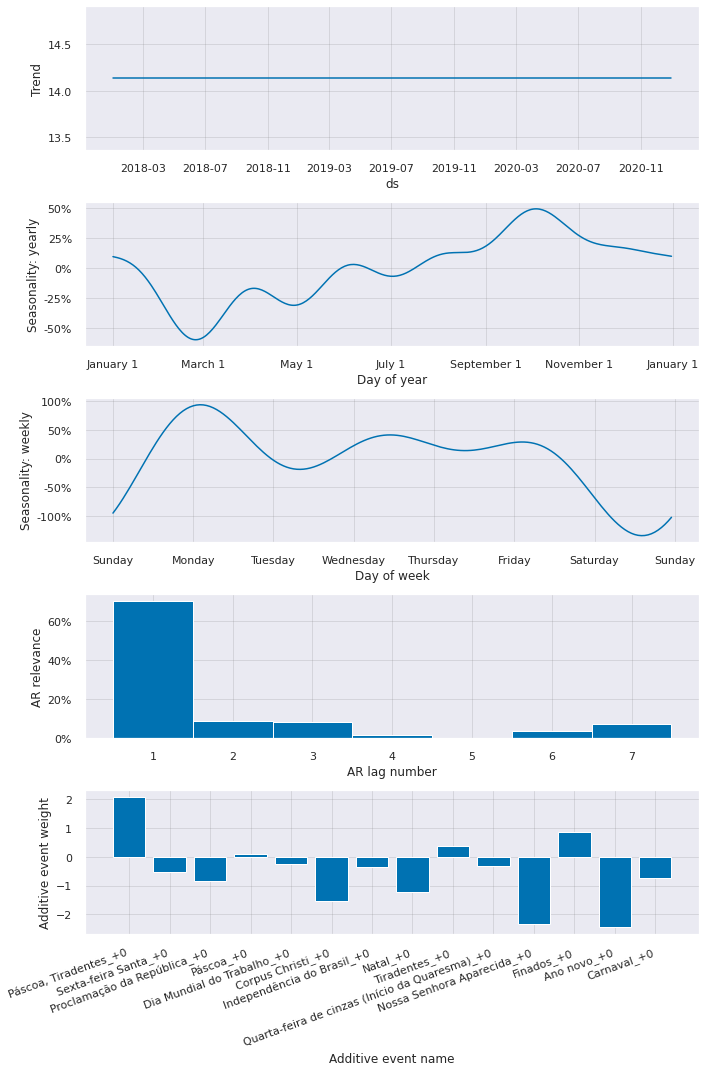

In [38]:
fig_param = m.plot_parameters()

In [39]:
# fig, ax = plt.subplots(figsize=(14, 10))
# ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
# ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

# # You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.


## 1. SimpleBenchmark
Setting up a series of Train Test Experiments is quick:

https://colab.research.google.com/github/ourownstory/neural_prophet/blob/main/tutorials/feature-use/benchmarking.ipynb#scrollTo=12697c82-16f0-4807-8ac5-66aa730fa0f6

In [40]:
# !pip install  cmdstanpy==0.9.68
# !pip install prophet 

In [41]:
# dataset_list = [
#     Dataset(df = df_treino, name = "Geraçao Amazonas", freq = "D"),
#     # Dataset(df = peyton_manning_df, name = "peyton_manning", freq = "D"),
#     # Dataset(df = retail_sales_df, name = "retail_sales", freq = "D"),
#     # Dataset(df = yosemite_temps_df, name = "yosemite_temps", freq = "5min"),
#     # Dataset(df = ercot_load_df, name = "ercot_load", freq = "H"),
# ]
# model_classes_and_params = [
#     (NeuralProphetModel, {"seasonality_mode": "multiplicative", "learning_rate": 0.1}),
#     (ProphetModel, {"seasonality_mode": "multiplicative"})
# ]

In [42]:
model_classes_and_params

NameError: ignored

In [ ]:
# benchmark = SimpleBenchmark(
#     model_classes_and_params=model_classes_and_params, # iterate over this list of tuples
#     datasets=dataset_list, # iterate over this list
#     metrics=["MSE", "MASE", "RMSE"],
#     test_percentage=25,
# )
# results_train, results_test = benchmark.run()

In [ ]:
results_test

In [ ]:
best_params = all_params[np.argmin(mapes)]
print(best_params)

## 2. CrossValidationBenchmark
Setting up a series of crossvalidated experiments is just as simple:

In [ ]:
# benchmark_cv = CrossValidationBenchmark(
#     model_classes_and_params=model_classes_and_params, # iterate over this list of tuples
#     datasets=dataset_list, # iterate over this list
#     metrics=["MASE", "RMSE"],
#     test_percentage=10,
#     num_folds=3,
#     fold_overlap_pct=0,
# )
# results_summary, results_train, results_test = benchmark_cv.run()

In [ ]:
# results_summary

In [ ]:
# air_passengers = results_summary[results_summary['data'] == 'Geraçao Amazonas']
# air_passengers = air_passengers[air_passengers['split'] == 'test']
# plt = air_passengers.plot(x='model', y='RMSE', kind='barh')

##2. Time-series Cross-Validation

In [ ]:
METRICS = ['SmoothL1Loss', 'MAE'] # MSE	RMSE	MAE	MAPE	MDAPE	SMAPE
params = {"seasonality_mode": "multiplicative", "learning_rate": 0.1}
folds = NeuralProphet(**params).crossvalidation_split_df(df_treino, freq="D", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

In [ ]:
metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    train = m.fit(df=df_treino, freq="D")
    test = m.test(df=df_teste)
    metrics_train = metrics_train.append(train[METRICS].iloc[-1])
    metrics_test = metrics_test.append(test[METRICS].iloc[-1])

In [ ]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

In [ ]:
#https://neuralprophet.com/html/test_and_crossvalidate.html?highlight=time%20series
#https://facebook.github.io/prophet/docs/diagnostics.html metricas

METRICS = ['SmoothL1Loss', 'MAE'] # MSE	RMSE	MAE	MAPE	MDAPE	SMAPE
params = {"seasonality_mode": "additive", "learning_rate": 0.1}

#df = pd.read_csv(data_location + "air_passengers.csv")
folds = NeuralProphet(**params).crossvalidation_split_df(df_treino, freq="D", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

In [ ]:
metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    train = m.fit(df=df_treino, freq="D")
    test = m.test(df=df_teste)
    metrics_train = metrics_train.append(train[METRICS].iloc[-1])
    metrics_test = metrics_test.append(test[METRICS].iloc[-1])


In [ ]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

## **2 Using Benchmark Framework**

https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/tutorials/feature-use/benchmarking.ipynb#scrollTo=270a689e-47f5-45cb-9b2f-18196d149348

In [ ]:
#from neuralprophet.benchmark import Dataset, NeuralProphetModel, SimpleExperiment, CrossValidationExperiment
from neuralprophet import NeuralProphet, set_log_level
from neuralprophet.benchmark import Dataset, NeuralProphetModel, ProphetModel
from neuralprophet.benchmark import SimpleBenchmark, CrossValidationBenchmark

## 1. SimpleBenchmark

In [ ]:
## Uncomment to install
#! pip install fbprophet

In [ ]:
# !pip install prophet[live] #Jupyter Notbook

In [ ]:
#  ! pip install pystan==2.19.1.1

In [ ]:
# !pip install prophet

In [ ]:
#benchmark = SimpleBenchmark(
#    model_classes_and_params=model_classes_and_params, # iterate over this list of tuples
#    datasets=dataset_list, # iterate over this list
#    metrics=["MAE", "MAPE", "MSE", "MASE", "RMSE"],
#    test_percentage=25,
#)
#results_train, results_test = benchmark.run()

In [ ]:
#results_test

https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/tutorials/feature-use/benchmarking.ipynb#scrollTo=27e909a2-cbc5-4703-a1e6-8963921b6364

## 2. CrossValidationBenchmark

https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/tutorials/feature-use/benchmarking.ipynb#scrollTo=270a689e-47f5-45cb-9b2f-18196d149348

https://neuralprophet.com/html/benchmarking.html

In [ ]:
#benchmark_cv = CrossValidationBenchmark(
#    model_classes_and_params=model_classes_and_params, # iterate over this list of tuples
#    datasets=dataset_list, # iterate over this list
#    metrics=["MAPE", "RMSE"],
#    test_percentage=10,
#    num_folds=3,
#    fold_overlap_pct=0,
#)
#results_summary, results_train, results_test = benchmark_cv.run()

In [ ]:
#results_summary

In [ ]:
#results_test

### **4.Referência Manual**

In [ ]:
# from neuralprophet.benchmark import SimpleExperiment, CrossValidationExperiment
# from neuralprophet.benchmark import ManualBenchmark, ManualCVBenchmark

In [ ]:
metrics = ["MAE", "MSE", "RMSE", "MASE", "RMSSE", "MAPE", "SMAPE"]
# experiments = [
#     SimpleExperiment(
#         model_class=NeuralProphetModel,
#        params={"seasonality_mode": "multiplicative", "learning_rate": 0.1, 'growth':'off',  'growth':'off', 'changepoints':None, 'n_changepoints':10, 
#                 'changepoints_range':0.9, 'trend_reg':0, 'trend_reg_threshold':False,  'yearly_seasonality':"auto",  'weekly_seasonality':"auto", 
#                 'daily_seasonality':"auto", 'seasonality_mode':"multiplicative", 'seasonality_reg':0,'n_forecasts':1,  'n_lags': 0,  
#                 'd_hidden':None,    'learning_rate':0.001, 'epochs':500, 'loss_func':"Huber", 'optimizer':"AdamW"}, 
                
#         data=Dataset(df=df_treino, name="geracao", freq="D"),
#         metrics=metrics,
#         test_percentage=25,
#     ),
#     SimpleExperiment(
#         model_class=ProphetModel,
#         params={"seasonality_mode": "multiplicative", },
#         data=Dataset(df=df_treino, name="geracao", freq="D"),
#         metrics=metrics,
#         test_percentage=25,
#     ),
# ]
# benchmark = ManualBenchmark(
#     experiments=experiments,
#     metrics=metrics,
# )
# results_train, results_test = benchmark.run()

In [ ]:
#results_test

###**5.ManualCVBenchmark: Manual CrossValidationExperiment Benchmark**

In [ ]:
#m

In [ ]:
# experiments = [
#     CrossValidationExperiment(
#         model_class=NeuralProphetModel,
#         params={"seasonality_mode": "multiplicative", "learning_rate": 0.1, 'growth':'off',  'growth':'off', 'changepoints':None, 'n_changepoints':10, 
#                 'changepoints_range':0.9, 'trend_reg':0, 'trend_reg_threshold':False,  'yearly_seasonality':"auto",  'weekly_seasonality':"auto", 
#                 'daily_seasonality':"auto", 'seasonality_mode':"multiplicative", 'seasonality_reg':0,'n_forecasts':1,  'n_lags': 0,  
#                 'd_hidden':None,    'learning_rate':0.001, 'epochs':500, 'loss_func':"Huber", 'optimizer':"AdamW"}, 
                
     
#         data=Dataset(df=df_pro, name="geracao", freq="D"),
#         metrics=metrics,
#         test_percentage=25,
#         num_folds=3,
#         fold_overlap_pct=0,
#     ),
#     CrossValidationExperiment(
#         model_class=ProphetModel,
#         params={"seasonality_mode": "multiplicative", },
#         data=Dataset(df=df_pro, name="geracao", freq="D"),
#         metrics=metrics,
#         test_percentage=25,
#         num_folds=3,
#         fold_overlap_pct=0,
#     ),
# ]
# benchmark_cv = ManualCVBenchmark(
#     experiments=experiments,
#     metrics=metrics,
# )
# results_summary, results_train, results_test = benchmark_cv.run()

In [ ]:
results_summary

In [ ]:
results = pd.DataFrame(results_summary)
results.head()

In [ ]:
print(results)

In [ ]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],   
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
maes = []  # Store the MAE for each params here
mapes = [] # Store the MAPE for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_treino)  # Fit model with given params
    df_cv = cross_validation(m, horizon='90 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
tuning_results['mape'] = mapes

In [ ]:
tuning_results_df = pd.DataFrame(tuning_results)

In [ ]:
tuning_results_df.sort_values(['mae','mape'])

In [ ]:
tuning_results_df.sort_values(['mape','mae'])

In [ ]:
best_params = all_params[np.argmin(mapes)]
print(best_params)